In [1]:
                                  #introduction
#What is Linear Regression?
# A supervised learning algorithm that models the relationship between
#a dependent variable (y) and one or more independent variables (X).

#Gradient Descent:- An iterative optimization algorithm used to minimize
#the loss function by updating parameters in the direction of steepest descent.

#Batch vs Stochastic Gradient Descent?
#Batch GD uses all training samples to compute gradients (stable but slow).
#Stochastic GD uses one sample at a time (faster but noisy updates).

#The reason we need numerical computation for systems like linear regression is because
#closed-form solutions become computationally expensive for large datasets,
#and gradient descent allows us to iteratively approximate the optimal solution.

#Goal = Find optimal weights (w) and bias (b) that minimize prediction error.

#Model: y = w·x + b (Linear hypothesis)
#Loss: L = (1/n) * Σ(y_pred - y_true)² (Mean Squared Error)
#Update Rule: w = w - α * ∂L/∂w (Gradient Descent step)



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple

plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (14, 10)

#---Model Hyperparameters----
learning_rate = 0.0001  # Step size for gradient descent (α)
regularization = 0.0    # L2 regularization strength (λ)
epochs = 1000           # Number of training iterations

#---Data Parameters----
n_samples = 100         # Number of data points
noise = 10.0            # Standard deviation of Gaussian noise

#True underlying relationship: y = 2.5x + 30
true_weight = 2.5
true_bias = 30

print(f"Learning Rate (α): {learning_rate}")
print(f"Regularization (λ): {regularization}")
print(f"Number of Epochs: {epochs}")
print(f"Training Samples: {n_samples}")
print(f"Noise Level: {noise}")


Learning Rate (α): 0.0001
Regularization (λ): 0.0
Number of Epochs: 1000
Training Samples: 100
Noise Level: 10.0


# Linear Regression: Mathematical Foundation

Using **Gradient Descent** to optimize the linear regression model:

$$
\hat{y} = \mathbf{w} \cdot \mathbf{x} + b
$$

---

## The Linear Model

### **Hypothesis Function**

For a single feature:

$$
h_\theta(x) = w \cdot x + b
$$

For multiple features (vectorized):

$$
h_\theta(\mathbf{X}) = \mathbf{X} \mathbf{w} + b
$$

where  
- $\mathbf{X}$ = feature matrix of shape $(n, d)$  
- $\mathbf{w}$ = weight vector of shape $(d,)$  
- $b$ = bias (scalar)  
- $n$ = number of samples  
- $d$ = number of features  

---

## Loss Function: Mean Squared Error (MSE)

The objective is to minimize the **Mean Squared Error**:

$$
\mathcal{L}(\mathbf{w}, b) = \frac{1}{n} \sum_{i=1}^{n} \left( \hat{y}_i - y_i \right)^2
$$

In matrix form:

$$
\mathcal{L}(\mathbf{w}, b) = \frac{1}{n} \| \mathbf{X}\mathbf{w} + b - \mathbf{y} \|_2^2
$$

---

## With L2 Regularization (Ridge Regression)

Adding regularization to prevent overfitting:

$$
\mathcal{L}_{\text{reg}}(\mathbf{w}, b) = \frac{1}{n} \sum_{i=1}^{n} \left( \hat{y}_i - y_i \right)^2 + \lambda \| \mathbf{w} \|_2^2
$$

where  
- $\lambda$ = regularization strength (hyperparameter)  
- $\| \mathbf{w} \|_2^2 = \sum_{j=1}^{d} w_j^2$ = L2 norm squared

# Gradient Descent Optimization

## Computing the Gradients

### **Gradient with respect to weights**

$$
\frac{\partial \mathcal{L}}{\partial \mathbf{w}} = \frac{2}{n} \mathbf{X}^T \left( \hat{\mathbf{y}} - \mathbf{y} \right) + 2\lambda \mathbf{w}
$$

### **Gradient with respect to bias**

$$
\frac{\partial \mathcal{L}}{\partial b} = \frac{2}{n} \sum_{i=1}^{n} \left( \hat{y}_i - y_i \right)
$$

---

## Parameter Update Rule

Using gradient descent, we update parameters iteratively:

$$
\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} - \alpha \frac{\partial \mathcal{L}}{\partial \mathbf{w}}
$$

$$
b^{(t+1)} = b^{(t)} - \alpha \frac{\partial \mathcal{L}}{\partial b}
$$

where  
- $\alpha$ = learning rate (step size)  
- $t$ = iteration number  

---

## Convergence Criterion

The algorithm converges when:

$$
\| \nabla \mathcal{L} \| < \epsilon
$$

or after a fixed number of iterations (epochs).

In [3]:
class LinearRegression:
    """Linear Regression using Gradient Descent"""
    
    def __init__(self, learning_rate: float = 0.01, regularization: float = 0.0):
        self.learning_rate = learning_rate
        self.regularization = regularization  # L2 regularization (Ridge)
        self.weights = None
        self.bias = None
        self.history = {'loss': [], 'weights': [], 'iteration': []}
    
    def fit(self, X: np.ndarray, y: np.ndarray, epochs: int = 1000, 
            verbose: bool = True) -> 'LinearRegression':
        """
        Train model using Gradient Descent
        X: (n_samples, n_features)
        y: (n_samples,)
        """
        n_samples, n_features = X.shape
        
        # Initialize weights and bias to zero
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for epoch in range(epochs):
            # Forward pass: compute predictions
            # ŷ = Xw + b
            y_pred = self.predict(X)
            
            # Compute loss (Mean Squared Error + L2 regularization)
            # L = (1/n) * ||ŷ - y||² + λ||w||²
            mse_loss = np.mean((y_pred - y) ** 2)
            reg_loss = self.regularization * np.sum(self.weights ** 2)
            loss = mse_loss + reg_loss
            
            # Compute gradients
            # ∂L/∂w = (2/n) * X^T(ŷ - y) + 2λw
            dw = (2 / n_samples) * X.T @ (y_pred - y) + 2 * self.regularization * self.weights
            # ∂L/∂b = (2/n) * Σ(ŷ - y)
            db = (2 / n_samples) * np.sum(y_pred - y)
            
            # Update parameters using gradient descent
            # w = w - α * ∂L/∂w
            self.weights -= self.learning_rate * dw
            # b = b - α * ∂L/∂b
            self.bias -= self.learning_rate * db
            
            # Store history for visualization
            if epoch % 5 == 0:
                self.history['loss'].append(loss)
                self.history['weights'].append(self.weights.copy())
                self.history['iteration'].append(epoch)
            
            if verbose and epoch % 100 == 0:
                print(f"Epoch {epoch}/{epochs}, Loss: {loss:.6f}")
        
        return self
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        """Make predictions: ŷ = Xw + b"""
        return X @ self.weights + self.bias
    
    def score(self, X: np.ndarray, y: np.ndarray) -> float:
        """Calculate R² score (coefficient of determination)"""
        y_pred = self.predict(X)
        ss_res = np.sum((y - y_pred) ** 2)  # Residual sum of squares
        ss_tot = np.sum((y - np.mean(y)) ** 2)  # Total sum of squares
        return 1 - (ss_res / ss_tot)

#Computational Advantage:- Simple iterative updates, works well for large datasets
#where closed-form solution (Normal Equation) is computationally expensive.

#Critical Limitation:- Requires careful tuning of learning rate α.
#Too large → divergence, Too small → slow convergence.

# Time Complexity Analysis

## Gradient Descent Complexity

For each iteration of gradient descent:

| Operation | Complexity |
|-----------|------------|
| Forward pass: $\mathbf{X}\mathbf{w}$ | $O(nd)$ |
| Loss computation | $O(n)$ |
| Gradient $\frac{\partial L}{\partial \mathbf{w}}$: $\mathbf{X}^T(\hat{\mathbf{y}} - \mathbf{y})$ | $O(nd)$ |
| Gradient $\frac{\partial L}{\partial b}$ | $O(n)$ |
| Parameter update | $O(d)$ |

**Per iteration:** $O(nd)$

**Total for $T$ epochs:** $O(Tnd)$

---

## Comparison with Normal Equation

The closed-form solution (Normal Equation):

$$
\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

| Method | Time Complexity | Space Complexity |
|--------|-----------------|------------------|
| Normal Equation | $O(nd^2 + d^3)$ | $O(d^2)$ |
| Gradient Descent | $O(Tnd)$ | $O(d)$ |

---

## When to Use Each Method

- **Normal Equation**: Best when $d$ is small (< 10,000 features)
- **Gradient Descent**: Best when $n$ or $d$ is large, or for online learning

For $d \ll n$: Gradient Descent is preferred

For small $d$: Normal Equation may be faster (no iterations needed)

# Advantages and Disadvantages

## Gradient Descent

### **Advantages**

1. **Scalability**: Works efficiently with large datasets
   - Memory efficient: processes data in batches
   - Time: $O(Tnd)$ scales linearly with $n$

2. **Flexibility**: Easily extends to:
   - Non-linear models (neural networks)
   - Online/streaming learning
   - Custom loss functions

3. **Regularization**: Natural integration of L1/L2 penalties

### **Disadvantages**

1. **Hyperparameter Sensitivity**:
   - Learning rate $\alpha$ requires tuning
   - Poor choice leads to slow convergence or divergence

2. **Convergence**:
   - May get stuck in local minima (for non-convex problems)
   - Requires many iterations for high precision

3. **Feature Scaling**: Requires normalization for optimal performance

---

## Linear Regression (General)

### **Advantages**

1. **Interpretability**: Coefficients have clear meaning
2. **Simplicity**: Easy to implement and understand
3. **Efficiency**: Fast training and prediction
4. **No Hyperparameters** (basic version): Closed-form solution exists

### **Disadvantages**

1. **Linearity Assumption**: Cannot capture non-linear relationships
2. **Sensitive to Outliers**: MSE penalizes large errors heavily
3. **Multicollinearity**: Correlated features cause unstable estimates

In [4]:
def generate_linear_data(n_samples: int = 100, noise: float = 10.0) -> Tuple[np.ndarray, np.ndarray]:
    """Generate linear regression data with Gaussian noise"""
    np.random.seed(42)
    X = np.random.rand(n_samples, 1) * 100  # Features in range [0, 100]
    # True relationship: y = 2.5x + 30 + noise
    y = 2.5 * X.flatten() + 30 + np.random.randn(n_samples) * noise
    return X, y

# Generate training data
print("Generating dataset...")
X, y = generate_linear_data(n_samples=100, noise=10.0)
print(f"  - Number of samples: {len(X)}")
print(f"  - Number of features: {X.shape[1]}")
print(f"  - X range: [{X.min():.2f}, {X.max():.2f}]")
print(f"  - y range: [{y.min():.2f}, {y.max():.2f}]")

Generating dataset...
  - Number of samples: 100
  - Number of features: 1
  - X range: [0.55, 98.69]
  - y range: [32.11, 284.54]


In [5]:
# Train the model
print("\nTraining Linear Regression Model using Gradient Descent...")
print("-" * 70)

model = LinearRegression(learning_rate=0.0001, regularization=0.0)
model.fit(X, y, epochs=1000, verbose=True)

# Display results
print("\n" + "="*70)
print("TRAINING COMPLETE!")
print("="*70)

print(f"\nFinal Model Parameters:")
print(f"  Learned Weight (slope): {model.weights[0]:.4f}")
print(f"  Learned Bias (intercept): {model.bias:.4f}")
print(f"  True Weight: {true_weight}")
print(f"  True Bias: {true_bias}")
print(f"\n  Model equation: ŷ = {model.weights[0]:.4f} · x + {model.bias:.4f}")

print(f"\nModel Performance:")
print(f"  R² Score: {model.score(X, y):.4f}")
print(f"  Final Loss: {model.history['loss'][-1]:.4f}")


Training Linear Regression Model using Gradient Descent...
----------------------------------------------------------------------
Epoch 0/1000, Loss: 27123.423849
Epoch 100/1000, Loss: 369.932242
Epoch 200/1000, Loss: 366.667258
Epoch 300/1000, Loss: 363.439126
Epoch 400/1000, Loss: 360.247429
Epoch 500/1000, Loss: 357.091757
Epoch 600/1000, Loss: 353.971701
Epoch 700/1000, Loss: 350.886862
Epoch 800/1000, Loss: 347.836840
Epoch 900/1000, Loss: 344.821244

TRAINING COMPLETE!

Final Model Parameters:
  Learned Weight (slope): 2.9161
  Learned Bias (intercept): 1.8163
  True Weight: 2.5
  True Bias: 30

  Model equation: ŷ = 2.9161 · x + 1.8163

Model Performance:
  R² Score: 0.9362
  Final Loss: 341.9880


# Model Evaluation: $R^2$ Score

## Coefficient of Determination

The $R^2$ score measures how well the model explains variance in the data:

$$
R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}}
$$

where:

$$
SS_{\text{res}} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \quad \text{(Residual Sum of Squares)}
$$

$$
SS_{\text{tot}} = \sum_{i=1}^{n} (y_i - \bar{y})^2 \quad \text{(Total Sum of Squares)}
$$

---

## Interpretation

- $R^2 = 1$: Perfect fit (model explains all variance)
- $R^2 = 0$: Model is as good as predicting the mean
- $R^2 < 0$: Model is worse than predicting the mean


Generating visualizations...

Visualization saved as 'linear_regression_results.png'


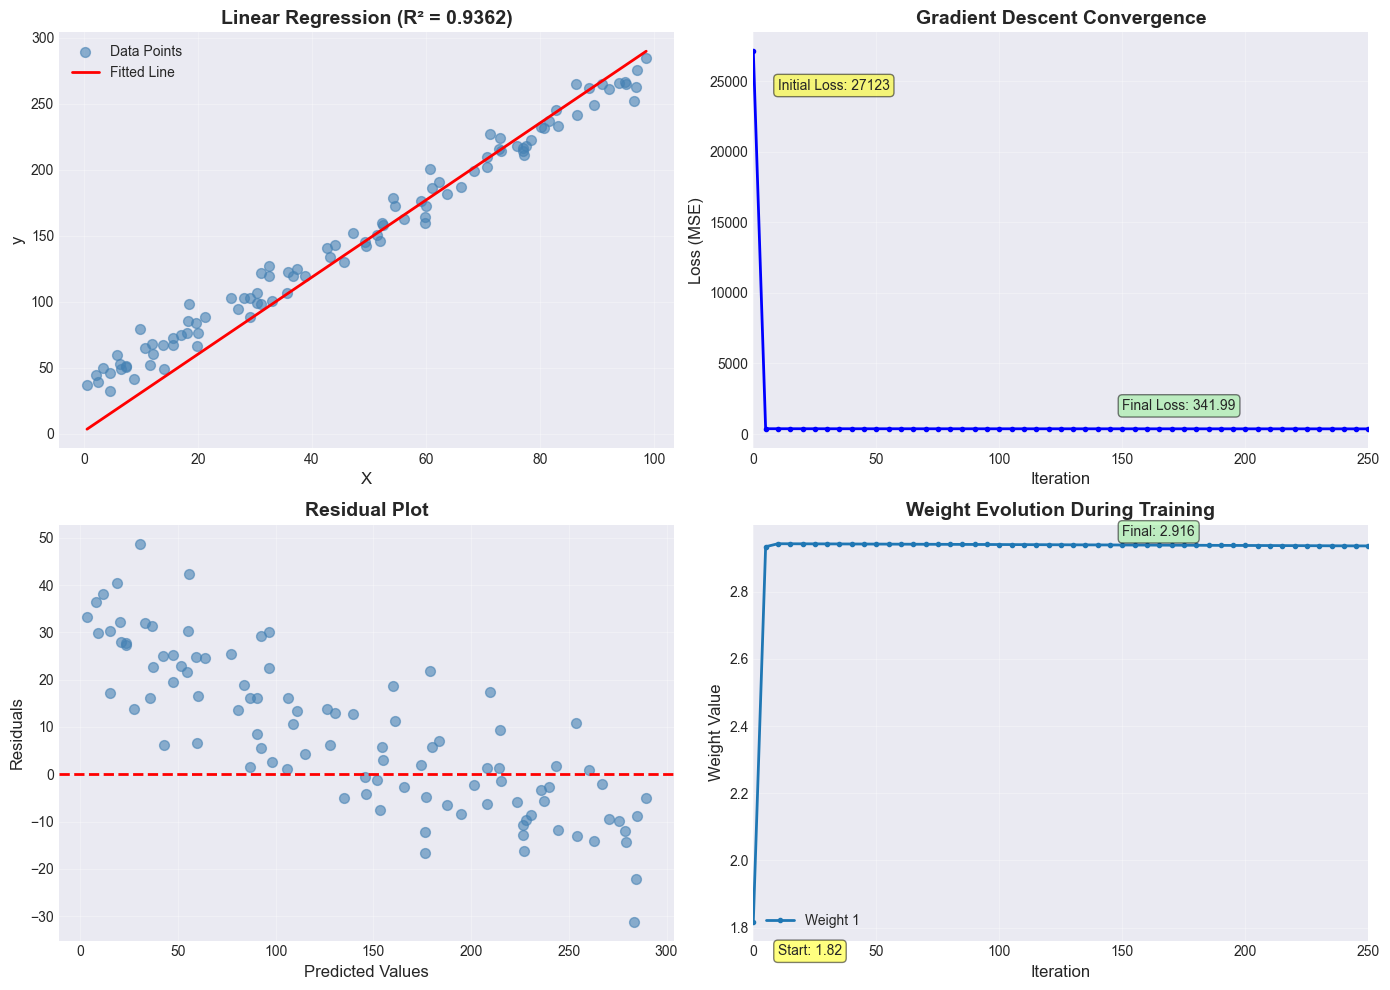

In [6]:
def visualize_linear_regression(X: np.ndarray, y: np.ndarray, model: LinearRegression):
    """Visualize linear regression results"""
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Plot 1: Data and fitted line
    ax1 = axes[0, 0]
    ax1.scatter(X, y, alpha=0.6, s=50, label='Data Points', color='steelblue')
    
    X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred = model.predict(X_line)
    ax1.plot(X_line, y_pred, 'r-', linewidth=2, label='Fitted Line')
    
    ax1.set_xlabel('X', fontsize=12)
    ax1.set_ylabel('y', fontsize=12)
    ax1.set_title(f'Linear Regression (R² = {model.score(X, y):.4f})', 
                 fontsize=14, fontweight='bold')
    ax1.legend(fontsize=10)
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Loss curve (Gradient Descent Convergence)
    ax2 = axes[0, 1]
    ax2.plot(model.history['iteration'], model.history['loss'], 'b-', 
            linewidth=2, marker='o', markersize=3)
    ax2.set_xlabel('Iteration', fontsize=12)
    ax2.set_ylabel('Loss (MSE)', fontsize=12)
    ax2.set_title('Gradient Descent Convergence', fontsize=14, fontweight='bold')
    ax2.set_xlim(0, 250)  # Zoom to first 250 iterations
    ax2.grid(True, alpha=0.3)
    
    # Add text annotations
    if len(model.history['loss']) > 0:
        start_loss = model.history['loss'][0]
        end_loss = model.history['loss'][-1]
        ax2.text(10, start_loss * 0.9, f'Initial Loss: {start_loss:.0f}', 
                fontsize=10, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))
        ax2.text(150, end_loss * 5, f'Final Loss: {end_loss:.2f}', 
                fontsize=10, bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))
    
    # Plot 3: Residuals
    ax3 = axes[1, 0]
    y_pred_train = model.predict(X)
    residuals = y - y_pred_train
    ax3.scatter(y_pred_train, residuals, alpha=0.6, s=50, color='steelblue')
    ax3.axhline(y=0, color='r', linestyle='--', linewidth=2)
    ax3.set_xlabel('Predicted Values', fontsize=12)
    ax3.set_ylabel('Residuals', fontsize=12)
    ax3.set_title('Residual Plot', fontsize=14, fontweight='bold')
    ax3.grid(True, alpha=0.3)

    # Plot 4: Weight evolution
    ax4 = axes[1, 1]
    weights_history = np.array(model.history['weights'])
    for i in range(weights_history.shape[1]):
        ax4.plot(model.history['iteration'], weights_history[:, i], 
                linewidth=2, marker='o', markersize=3, label=f'Weight {i+1}')
    ax4.set_xlabel('Iteration', fontsize=12)
    ax4.set_ylabel('Weight Value', fontsize=12)
    ax4.set_title('Weight Evolution During Training', fontsize=14, fontweight='bold')
    ax4.set_xlim(0, 250)  # Zoom to first 250 iterations
    ax4.legend(fontsize=10)
    ax4.grid(True, alpha=0.3)
    
    # Add text annotations
    if len(weights_history) > 0:
        start_weight = weights_history[0, 0]
        end_weight = weights_history[-1, 0]
        ax4.text(10, start_weight - 0.1, f'Start: {start_weight:.2f}', 
                fontsize=10, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))
        ax4.text(150, end_weight + 0.05, f'Final: {end_weight:.3f}', 
                fontsize=10, bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))
    
    plt.tight_layout()
    plt.savefig('linear_regression_results.png', dpi=300, bbox_inches='tight')
    print("\n" + "="*70)
    print("Visualization saved as 'linear_regression_results.png'")
    print("="*70)
    plt.show()

# Generate visualizations
print("\nGenerating visualizations...")
visualize_linear_regression(X, y, model)

# Convergence Analysis

## Learning Rate Selection

The learning rate $\alpha$ critically affects convergence:

### **Too Large** ($\alpha$ too big)

- Oscillation around minimum
- Possible divergence: $\mathcal{L}^{(t+1)} > \mathcal{L}^{(t)}$

### **Too Small** ($\alpha$ too small)

- Very slow convergence
- May not reach minimum in reasonable time

### **Optimal** ($\alpha$ just right)

- Smooth, monotonic decrease in loss
- Convergence in reasonable iterations

---

## Stability Condition

For convex problems like linear regression, convergence is guaranteed when:

$$
\alpha < \frac{2}{\lambda_{\max}(\mathbf{X}^T\mathbf{X})}
$$

where $\lambda_{\max}$ is the largest eigenvalue of $\mathbf{X}^T\mathbf{X}$.

In [7]:
# Sample predictions
sample_X = np.array([[25], [50], [75]])
predictions = model.predict(sample_X)

print("\nSample Predictions:")
print("-" * 40)
for x_val, pred in zip(sample_X.flatten(), predictions):
    true_val = 2.5 * x_val + 30  # True relationship
    print(f"  x = {x_val:.0f} → predicted ŷ = {pred:.2f} (true y ≈ {true_val:.2f})")


Sample Predictions:
----------------------------------------
  x = 25 → predicted ŷ = 74.72 (true y ≈ 92.50)
  x = 50 → predicted ŷ = 147.62 (true y ≈ 155.00)
  x = 75 → predicted ŷ = 220.52 (true y ≈ 217.50)


# Summary

## Key Concepts Demonstrated

| Concept | Formula |
|---------|--------|
| Linear Model | $\hat{y} = \mathbf{w} \cdot \mathbf{x} + b$ |
| MSE Loss | $\mathcal{L} = \frac{1}{n}\sum(\hat{y}_i - y_i)^2$ |
| Gradient Descent | $\mathbf{w} \leftarrow \mathbf{w} - \alpha \nabla_{\mathbf{w}} \mathcal{L}$ |
| $R^2$ Score | $R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$ |

---

## Complexity Summary

| Operation | Time Complexity |
|-----------|----------------|
| Single GD iteration | $O(nd)$ |
| Full training ($T$ epochs) | $O(Tnd)$ |
| Prediction | $O(d)$ |
| Normal Equation (alternative) | $O(nd^2 + d^3)$ |

In [8]:
print("\n" + "="*70)
print("PROJECT COMPLETE!")
print("="*70)
print("\nKey Concepts Demonstrated:")
print("  ✓ Linear Regression: ŷ = w·x + b")
print("  ✓ Gradient Descent: w = w - α·∇L")
print("  ✓ Loss Function: Mean Squared Error")
print("  ✓ Model Evaluation: R² Score")
print("  ✓ Time Complexity: O(Tnd) for training")
print("="*70 + "\n")


PROJECT COMPLETE!

Key Concepts Demonstrated:
  ✓ Linear Regression: ŷ = w·x + b
  ✓ Gradient Descent: w = w - α·∇L
  ✓ Loss Function: Mean Squared Error
  ✓ Model Evaluation: R² Score
  ✓ Time Complexity: O(Tnd) for training

